# Project: Seattle hotel room rental price prediction

## Business Understanding

### Q1. Which month of the year earns the most income from renting out hotel rooms?
### Q2. What is the typical price for a Seattle hotel listed on Airbnb?
### Q3: Given input criteria such as room size, number of room, or number of bed, ... what would be the room price?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:

def format_column(df_input, list_columns):
    """
    This function removes dollar signs ($) and commas (,)

    Parameters:
    df_input (pd.DataFrame): DataFrame containing the columns to be removed.
    list_columns (list): List of column names

    Returns:
    pd.DataFrame: DataFrame output after format.
    """
    for col in list_columns:
        df_input[col] = df_input[col].replace({r'\$': '', ',': ''}, regex=True).astype(float)
    
    return df_input


# Data Cleaning

###  Load data

In [3]:
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')
df_listing = pd.read_csv('listings.csv')

In [4]:
print(df_calendar.shape)
print(df_calendar.columns)
df_calendar.head()

(1393570, 4)
Index(['listing_id', 'date', 'available', 'price'], dtype='object')


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Need to convert data column to datetime format and convert price column to real number format

In [5]:
print(df_reviews.shape)
print(df_reviews.columns)
df_reviews.head()

(84849, 6)
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


This data does not contain any rating or review columns, making it difficult to evaluate or analyze the data directly.
So we will not use this table

In [6]:
print(df_listing.shape)
# Show the column names of the listing dataframe
print(df_listing.columns)
df_listing.head()

(3818, 92)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'am

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


There are too many columns, so consider keeping only the ones needed for analysis.

## Preprocessing dataframe

### 2. Clear missing data

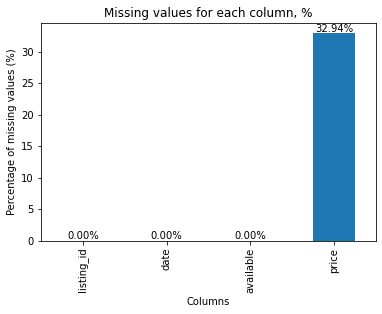

In [7]:
df_calendar_missing = df_calendar.isnull().mean() * 100

# Create a bar plot to show the missing data analysis
ax = df_calendar_missing.plot(kind="bar")
plt.title("Missing values for each column, %")
plt.xlabel("Columns")
plt.ylabel("Percentage of missing values (%)")

# Add labels for missing features
for i in range(len(df_calendar_missing)):
    ax.text(i, df_calendar_missing.iloc[i], f"{df_calendar_missing.iloc[i]:.2f}%", ha='center', va='bottom')

plt.show()

Since only about 32.94% is missing, we will delete the missing value of PRICE.
(We have determined that about 67.06% of the data is enough.)

In [8]:
df_calendar = df_calendar.dropna(subset=['price'])

# Change 'time' column to datetime
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['year'] = pd.to_datetime(df_calendar['date']).dt.strftime("%y")
df_calendar['month'] = pd.to_datetime(df_calendar['date']).dt.strftime("%m")
df_calendar['year'] = df_calendar['year'].astype(int)
df_calendar['month'] = df_calendar['month'].astype(int)

# Sort dataframe by 'time' column from smallest to largest
df_calendar = df_calendar.sort_values(by='date', ascending=True)

# Use the function to clean columns in the df_calendar DataFrame
df_calendar = format_column(df_calendar, ['price'])

In [9]:
print(df_calendar["available"].unique())

['t']


In [10]:
# There is only 1 unique value so the available column can be deleted
df_calendar = df_calendar.drop('available', axis=1)
df_calendar

,listing_id,date,price,year,month
0,241032,2016-01-04,85.0,16,1
829645,7922663,2016-01-04,49.0,16,1
829280,9063355,2016-01-04,50.0,16,1
828550,2016613,2016-01-04,300.0,16,1
827820,788146,2016-01-04,58.0,16,1
...,...,...,...,...,...
74094,7381677,2017-01-02,199.0,17,1
784749,6482409,2017-01-02,105.0,17,1
1094,3308979,2017-01-02,975.0,17,1
776719,2197168,2017-01-02,135.0,17,1


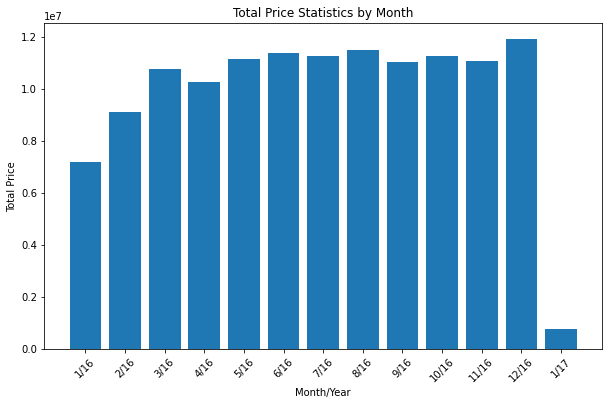

In [11]:
df_grouped = df_calendar.groupby(['year', 'month']).agg({'price': 'sum'}).reset_index()

# Draw the box plot
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['month'].astype(str) + '/' + df_grouped['year'].astype(str), df_grouped['price'])

# Add labels and legend
plt.xlabel('Month/Year')
plt.ylabel('Total Price')
plt.title('Total Price Statistics by Month')
plt.xticks(rotation=45)
plt.show()


In [12]:
df_grouped

,year,month,price
0,16,1,7201591.0
1,16,2,9113355.0
2,16,3,10798161.0
3,16,4,10272371.0
4,16,5,11159008.0
5,16,6,11391415.0
6,16,7,11288732.0
7,16,8,11502179.0
8,16,9,11065949.0
9,16,10,11296639.0


### Answer Q1: From the chart, it can be seen that the income from hotel rental is the highest in the last months of the year. And the month that earns the most money from this is December

### Processing for df_listing dataframe

In [13]:
# Select features that affect room rental prices
list_selected_columns = [
    "id",
    "bathrooms",
    "bedrooms",
    "beds",
    "square_feet",
    "price",
    "guests_included",
]

In [14]:
# Drop records has NaN value in price column
df_listing = df_listing.dropna(subset=['price'])

# Select some column to predict the price
df_listing = df_listing[list_selected_columns]

# Format column price
df_listing = format_column(df_listing, ['price'])


In [15]:
# Check duplicate columns id
len(df_listing["id"]) == len(df_listing["id"].unique())

True

In [16]:
df_listing = df_listing.drop('id', axis=1)


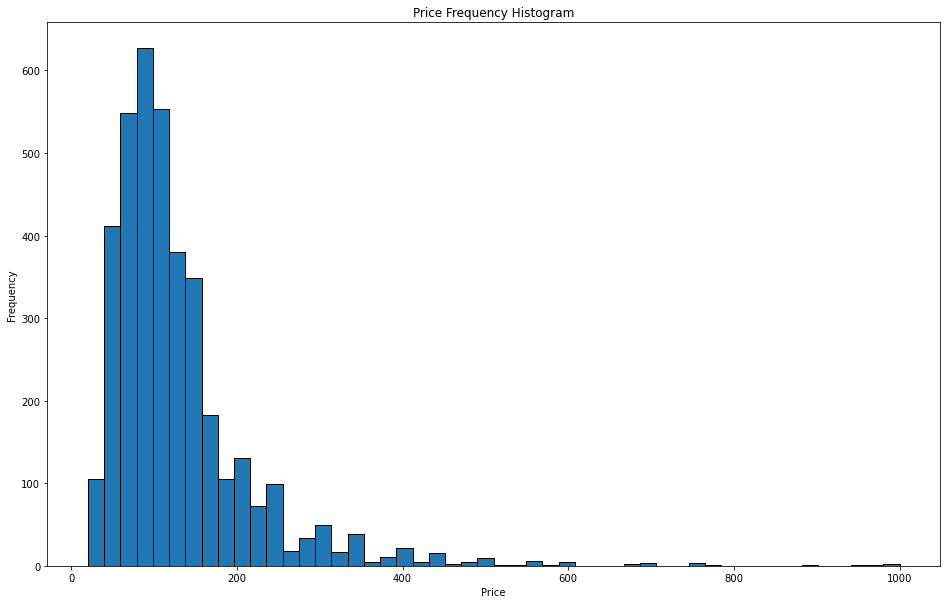

In [17]:
# Vẽ histogram để thể hiện khoảng mức giá phổ biến
plt.figure(figsize=(16, 10))
plt.hist(df_listing['price'], bins=50, edgecolor='black')  # Chia thành 5 bins

# Thêm nhãn và tiêu đề
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Frequency Histogram')

# Hiển thị biểu đồ
plt.show()

### Answer Q2: Based on the chart, we see that the listed price of a hotel room usually falls between 50 and 150 dollars.

##### Preprocessing data

<AxesSubplot:>

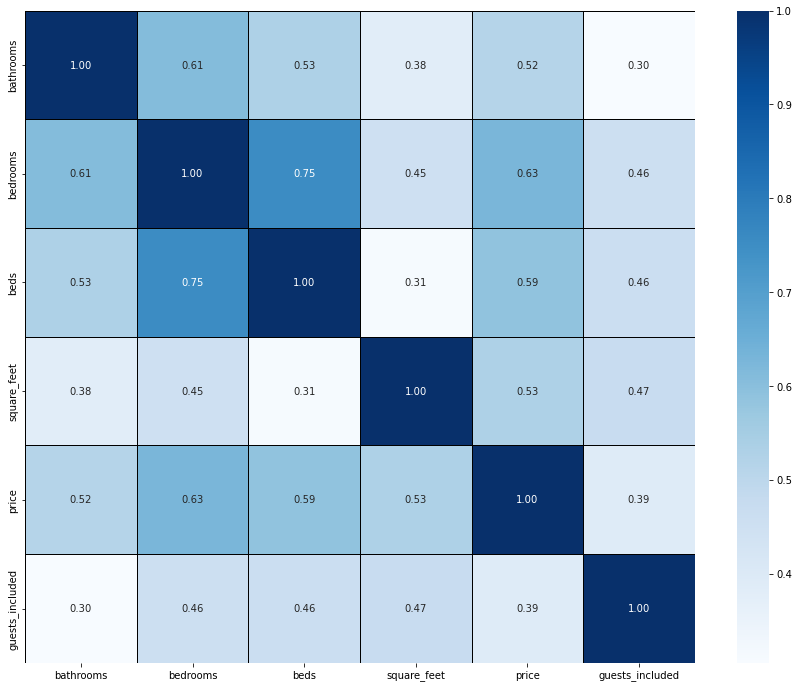

In [18]:
# Calculate correlation matrix
corr = df_listing.corr()

# Draw heatmap with filtered data
plt.figure(figsize=(15, 12))
sb.heatmap(corr, cmap="Blues", annot=True, fmt=".2f", 
           cbar=True, linewidths=0.5, linecolor='black')


In [19]:
df_listing = df_listing.fillna(0)
df_listing.head()

,bathrooms,bedrooms,beds,square_feet,price,guests_included
0,1.0,1.0,1.0,0.0,85.0,2
1,1.0,1.0,1.0,0.0,150.0,1
2,4.5,5.0,7.0,0.0,975.0,10
3,1.0,0.0,2.0,0.0,100.0,1
4,2.0,3.0,3.0,0.0,450.0,6


##### Create train-test split

In [20]:
X = df_listing.drop('price', axis=1)
y = df_listing['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


##### Training model

In [21]:
# Create pipeline with MinMaxScaler and LinearRegression and fit model
scaler = MinMaxScaler()
lm_model = make_pipeline(MinMaxScaler(), LinearRegression())

lm_model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

##### Evaluate the model

In [22]:
# Predict on the test dataset
y_pred = lm_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

R-squared: 0.4777
Mean Squared Error: 4472.9959


##### Because it is a test model and has not been fine-tuned, the accuracy of the current model is not high. After completing the course, we will update the model and add more data processing methods to improve the model accuracy.

#### Now, You can predict the price of a room when renting with input conditions like
- bathrooms: 1
- bedrooms: 1
- beds: 1
- square_feet: 250
- guests_included: 2

In [23]:
price_predict = lm_model.predict([[1, 1, 1, 250, 2]])
print(round(price_predict[0], 2))

102.3


C:\Users\khanglv1\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Answer Q3:
So the room price when rented with the input conditions is:
- bathrooms: 1
- bedrooms: 1
- beds: 1
- square_feet: 250
- guests_included: 2

Then the amount as the model predicted will be about 102.3 dollars